# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 428699140
sectors = np.array([37])

period = 1.9269015518
tdepth = 0.0480941478**2

lc = pd.read_csv("TOI_3082_37.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

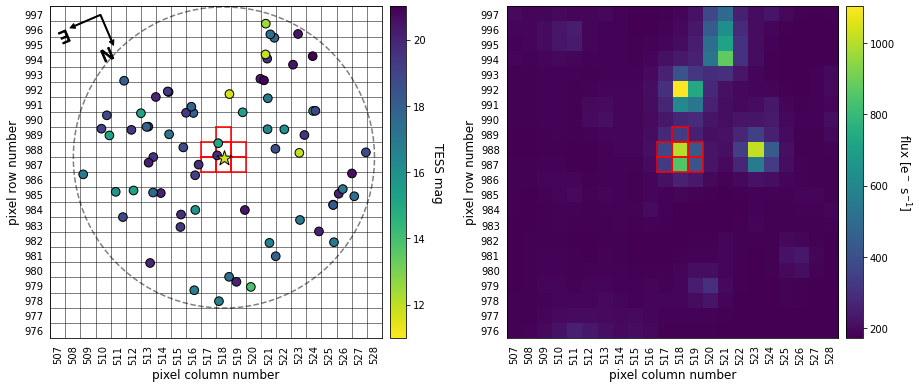

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,428699140,11.7662,10.659,10.040,9.881,195.908637,-19.218863,0.664000,0.684655,4249.0,8.817080,0.000,0.000
1,951993914,19.7820,NaN,NaN,NaN,195.910815,-19.220632,NaN,NaN,NaN,2.113530,9.768,130.709
2,428699131,14.9870,14.070,13.577,13.378,195.908422,-19.224730,NaN,3.209950,5027.0,0.258507,21.134,181.978
3,951993916,19.6406,NaN,NaN,NaN,195.919283,-19.220237,NaN,NaN,NaN,0.716330,36.526,97.788
4,951993915,19.0800,NaN,NaN,NaN,195.922341,-19.217065,NaN,NaN,4655.0,0.175433,47.034,82.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,428699114,12.5045,11.843,11.521,11.486,195.870920,-19.259115,1.070000,1.181110,5891.0,1.905660,193.477,221.492
67,428699918,16.9241,15.267,14.507,14.339,195.964128,-19.234438,0.406333,0.413230,3308.0,2.361260,196.782,106.564
68,428699146,18.7043,16.822,15.906,15.678,195.854598,-19.199002,NaN,NaN,3733.0,1.583520,197.133,291.256
69,428699162,16.6593,15.734,15.044,15.116,195.934121,-19.169549,0.810000,0.797995,4932.0,0.556681,197.543,26.018


In [4]:
ap = np.array([[517, 987], [518, 987], [519, 987], [517, 988], 
               [518, 988], [519, 988], [518, 989]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,428699140,11.7662,10.659,10.040,9.881,195.908637,-19.218863,0.664000,0.684655,4249.0,8.817080,0.000,0.000,9.566493e-01,0.002418
1,951993914,19.7820,NaN,NaN,NaN,195.910815,-19.220632,NaN,NaN,NaN,2.113530,9.768,130.709,5.772599e-04,0.000000
2,428699131,14.9870,14.070,13.577,13.378,195.908422,-19.224730,NaN,3.209950,5027.0,0.258507,21.134,181.978,4.040795e-02,0.057242
3,951993916,19.6406,NaN,NaN,NaN,195.919283,-19.220237,NaN,NaN,NaN,0.716330,36.526,97.788,2.507789e-04,0.000000
4,951993915,19.0800,NaN,NaN,NaN,195.922341,-19.217065,NaN,NaN,4655.0,0.175433,47.034,82.094,1.622351e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,428699114,12.5045,11.843,11.521,11.486,195.870920,-19.259115,1.070000,1.181110,5891.0,1.905660,193.477,221.492,1.976012e-23,0.000000
67,428699918,16.9241,15.267,14.507,14.339,195.964128,-19.234438,0.406333,0.413230,3308.0,2.361260,196.782,106.564,4.093798e-28,0.000000
68,428699146,18.7043,16.822,15.906,15.678,195.854598,-19.199002,NaN,NaN,3733.0,1.583520,197.133,291.256,2.227166e-29,0.000000
69,428699162,16.6593,15.734,15.044,15.116,195.934121,-19.169549,0.810000,0.797995,4932.0,0.556681,197.543,26.018,1.698342e-32,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

428699131


# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 428699140.
Calculating EB and EBx2P scenario probabilities for 428699140.
Calculating PTP scenario probability for 428699140.
Calculating PEB and PEBx2P scenario probabilities for 428699140.
Calculating STP scenario probability for 428699140.
Calculating SEB and SEBx2P scenario probabilities for 428699140.
Calculating DTP scenario probability for 428699140.
Calculating DEB and DEBx2P scenario probabilities for 428699140.
Calculating BTP scenario probability for 428699140.
Calculating BEB and BEBx2P scenario probabilities for 428699140.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 428699131.
Wall time: 2h 21min 7s


In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.006611179357627672
NFPP =  5.648054147121811e-28


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,428699140,TP,0.664000,0.684655,1.926902,89.809778,0.030944,0.166457,306.512434,3.354618,0.000000,0.000000,8.364984e-01
1,428699140,EB,0.664000,0.684655,1.926902,83.898025,0.798491,0.223935,153.306346,0.000000,0.100764,0.121096,3.234815e-34
2,428699140,EBx2P,0.664000,0.684655,3.853803,85.859229,0.598090,0.659624,168.673257,0.000000,0.653336,0.677469,3.895386e-08
3,428699140,PTP,0.664000,0.684655,1.926902,89.008886,0.098164,0.318764,80.595779,3.376062,0.000000,0.000000,1.116574e-01
4,428699140,PEB,0.664000,0.684655,1.926902,85.134895,0.592884,0.508628,188.641649,0.000000,0.102283,0.123258,3.006820e-24
5,428699140,PEBx2P,0.664000,0.684655,3.853803,86.020157,0.665723,0.643104,179.323789,0.000000,0.633940,0.653781,3.442473e-07
6,428699140,STP,0.593679,0.593229,1.926902,89.161536,0.139996,0.036276,267.957817,5.117336,0.000000,0.000000,6.419222e-03
7,428699140,SEB,0.103496,0.124968,1.926902,89.414075,0.109454,0.845981,197.399938,0.000000,0.053361,0.100000,8.009839e-08
8,428699140,SEBx2P,0.196162,0.226495,3.853803,88.411694,0.487323,0.687468,179.966117,0.000000,0.193248,0.223823,2.959225e-08
9,428699140,DTP,0.664000,0.684655,1.926902,89.765983,0.030587,0.135196,40.905985,3.345509,0.000000,0.000000,4.523304e-02


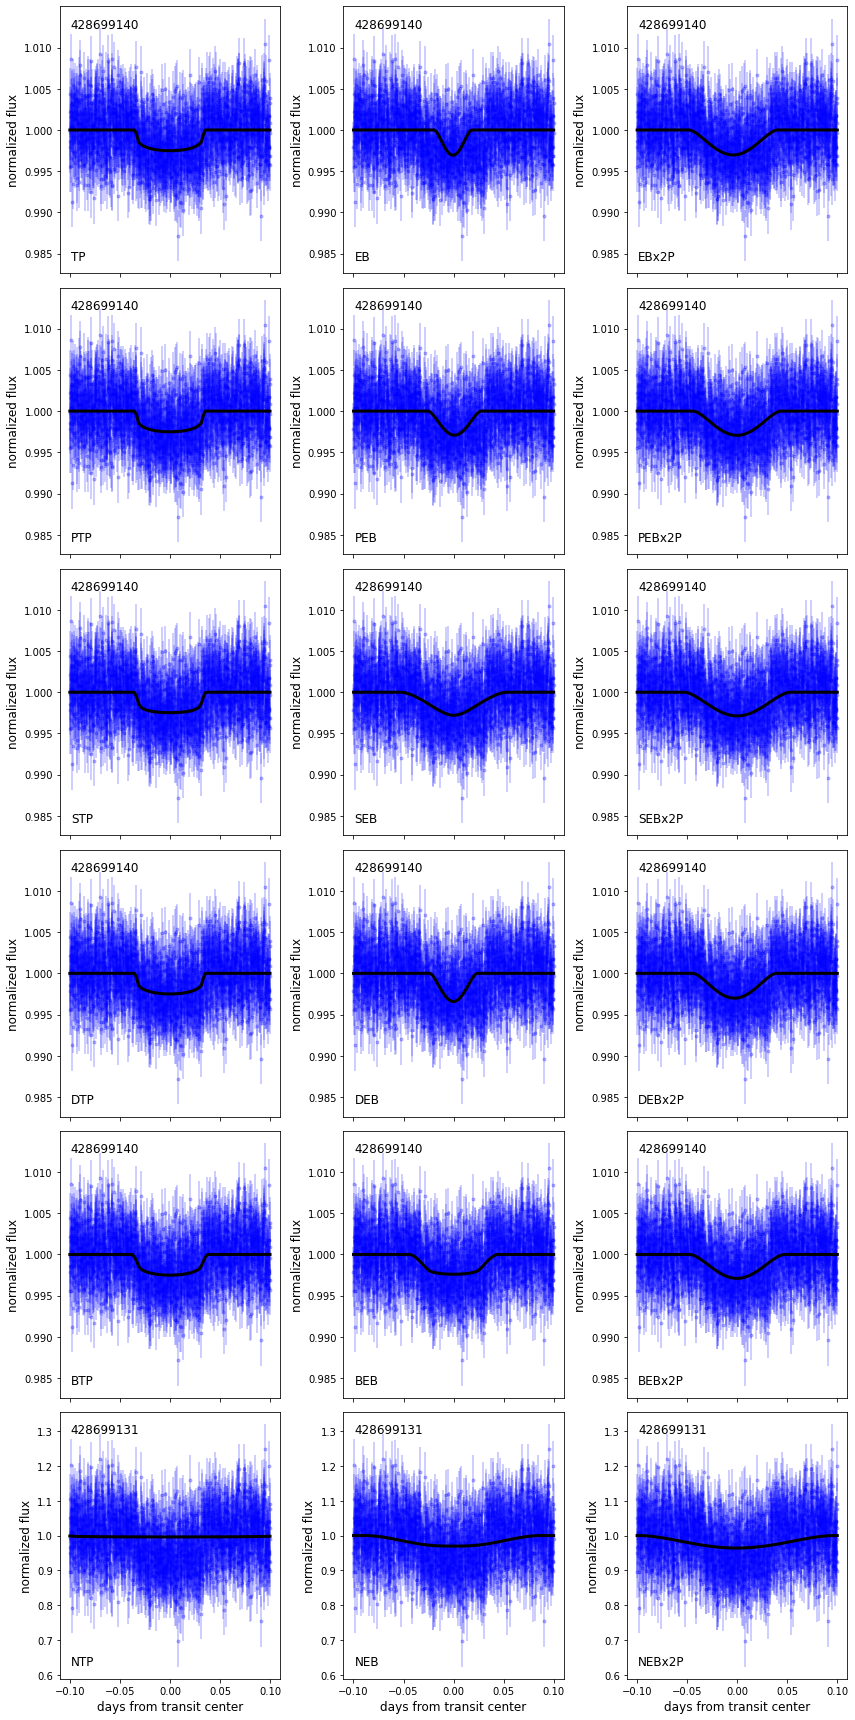

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))